## Import necessary libraries

In [67]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [68]:
df = pd.read_csv("Cancer_Data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [69]:
df.shape

(569, 33)

## Data Preprocesing

In [70]:
# drop column "Unnamed: 32"
df = df.drop(columns="Unnamed: 32", errors="ignore")

In [71]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='radius_mean', ylabel='texture_mean'>

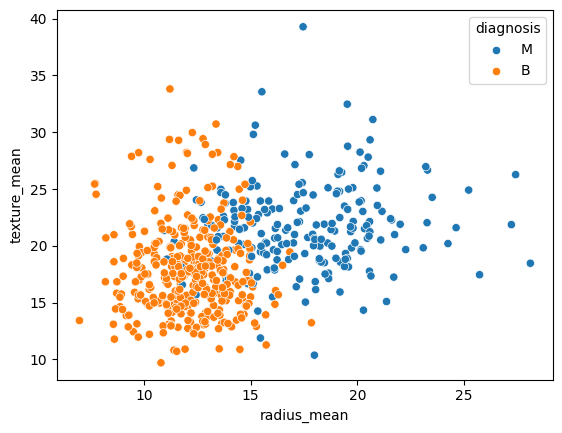

In [72]:
sns.scatterplot(df, x="radius_mean", y="texture_mean", hue="diagnosis")

In [73]:
# extract features and standardize them
X = df.iloc[:, 2:]
X = MinMaxScaler().fit_transform(X)
# extract target and dummy the categories
y = df["diagnosis"].replace({"M":1, "B":0})

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_17456\2243984968.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df["diagnosis"].replace({"M":1, "B":0})


In [74]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
x_train.shape, y_train.shape

((455, 30), (455,))

# Create model and fit it

In [76]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)

KNeighborsClassifier()

## Test model

In [77]:
yhat = KNN.predict(x_test)

In [78]:
accuracy_score(y_test, yhat)

0.9649122807017544

In [79]:
f1_score(y_test, yhat)

0.9534883720930233

In [80]:
confusion_matrix(y_test, yhat)

array([[69,  2],
       [ 2, 41]])

### Using cross validation to obtain best k value

In [81]:
# create a range of k values and apply cross validation with 3 folds
k_values = range(1, 21)
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=5).mean()
    scores.append(score)

In [82]:
best_k = k_values[scores.index(max(scores))]
best_k

19

### Train final model

In [83]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=19)

In [84]:
accuracy = knn_final.score(x_test, y_test)
print(f"Final Model Accuracy: {accuracy:.2f}")

Final Model Accuracy: 0.96
